Set parameter OutputFlag to value 1
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[arm] - Darwin 24.5.0 24F74)

CPU model: Apple M1 Max
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Non-default parameters:
TimeLimit  3600

Optimize a model with 30101 rows, 10300 columns and 1545100 nonzeros
Model fingerprint: 0xd93fc9cf
Variable types: 200 continuous, 10100 integer (10100 binary)
Coefficient statistics:
  Matrix range     [9e-03, 4e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Found heuristic solution: objective 175.7505662
Presolve removed 300 rows and 100 columns
Presolve time: 2.26s
Presolved: 29801 rows, 10200 columns, 1534800 nonzeros
Variable types: 200 continuous, 10000 integer (10000 binary)

Deterministic concurrent LP optimizer: primal and dual simplex (primal and dual model)
Showing primal log only...

Root relaxation presolved: 29801 rows, 10200 columns, 1534800 nonzeros


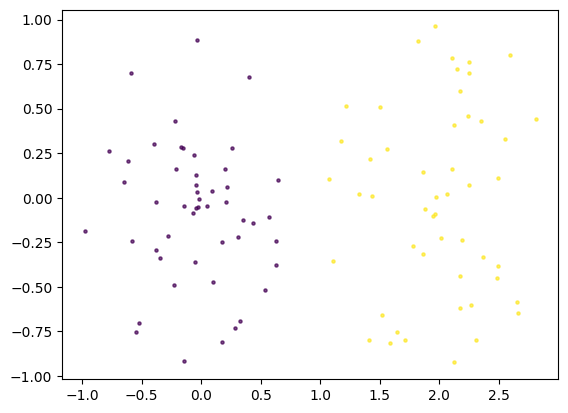

In [24]:
from domp_f import *

file = "synth_data/instance_n100_m2_s0_d2_o00_0.txt"
method = "cent"
alpha=0.5
p=2
time_limit=3600
relax=False

domp_solver = DOMP(file, method, time_limit, relax, p, alpha)
domp_solver.solve_BEP()
results=domp_solver.solution_info

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib as mpl

Centers = [i for i in range(domp_solver.n) if results["Y"][i]>0.5]
Assignments = [[i for i in range(domp_solver.n) if results["Z"][i,j]>0.5] for j in range(domp_solver.n) if j in Centers]
X = np.loadtxt(file)
norm = Normalize(vmin=0, vmax=p - 1)
cmap = mpl.colormaps['viridis']  # or colormaps.get_cmap('viridis')


for j in range(p):
    color = cmap(norm(j))
    plt.scatter(X[Assignments[j], 0], X[Assignments[j], 1], color=color, alpha=0.7, s=5)

